In [96]:
# This notebook investigates global yearly periodicity of influenza activity

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fft

data_dir = "../Datasets/influenza_activity.csv"
influ = pd.read_csv(data_dir)

data_dir = "../Datasets/country_codes.csv"
cc = influ["country_code"].unique()

In [97]:
# -》numpy
dic = {}
for c_name in cc:
    print(c_name)
    pdata = influ[influ["country_code"]==c_name]
    mat = pdata[["start_date","total_num_influenza_positive_viruses"]].as_matrix()
    keys = mat[:,0]
    values = mat[:,1]
    subdic = dict(zip(keys, values))
    dic[c_name] = subdic

AFG
ALB
DZA
AGO
AIA
ATG
ARG
ARM
ABW
AUS
AUT
AZE
BHS
BHR
BGD
BRB
BLR
BEL
BLZ
BMU


C:\Users\surface\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


BTN
BOL
BIH
BRA
BGR
BFA
KHM
CMR
CAN
CYM
CAF
CHL
CHN
COL
COG
CRI
HRV
CUB
CYP
CZE
COD
DNK
DMA
DOM
ECU
EGY
SLV
EST
ETH
FJI
FIN
FRA
GUF
GEO
DEU
GHA
GRC
GLP
GTM
GIN
GUY
HTI
HND
HUN
ISL
IND
IDN
IRN
IRQ
IRL
ISR
ITA
JAM
JPN
JOR
KAZ
KEN
KWT
KGZ
LVA
LBN
LTU
LUX
MDG
MYS
MDV
MLI
MLT
MTQ
MRT
MUS
MEX
MNG
MNE
MSR
MAR
MOZ
MMR
NPL
NLD
NCL
NZL
NIC
NER
NGA
MKD
NOR
OMN
PAK
PAN
PNG
PRY
PER
PHL
POL
PRT
QAT
KOR
MDA
ROU
RUS
RWA
KNA
LCA
VCT
SAU
SEN
SRB
SLE
SGP
SVK
SVN
ZAF
ESP
LKA
SDN
SUR
SWE
CHE
SYR
TJK
THA
TLS
TGO
TTO
TUN
TUR
TKM
UGA
UKR
GBR
TZA
USA
URY
UZB
VEN
VNM
ZMB


C:\Users\surface\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


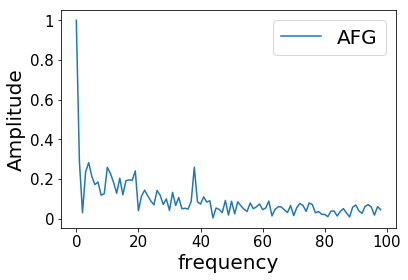

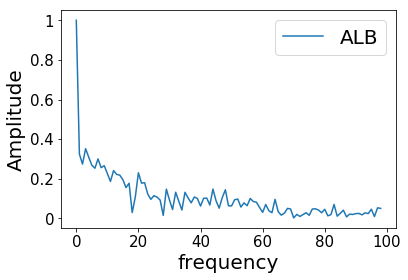

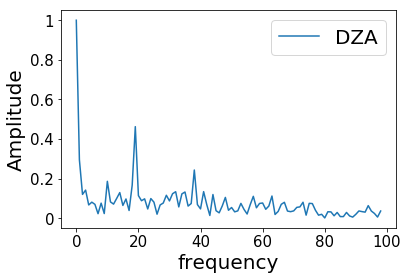

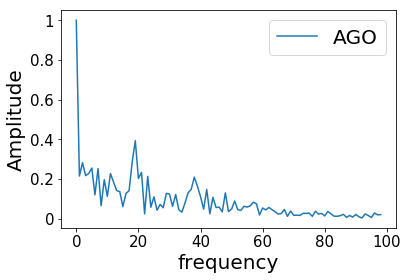

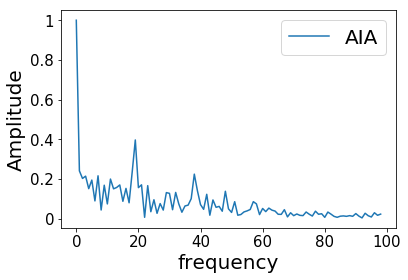

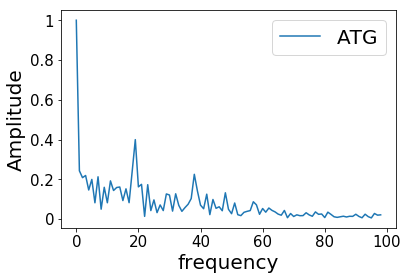

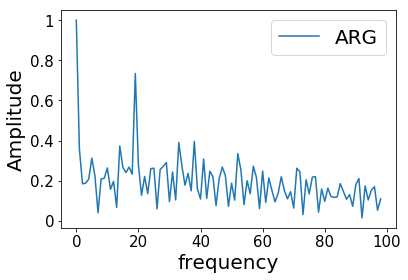

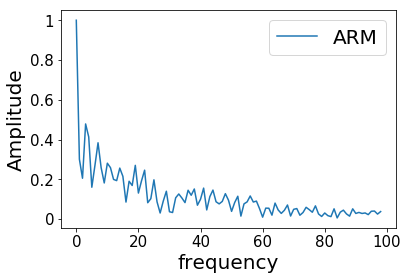

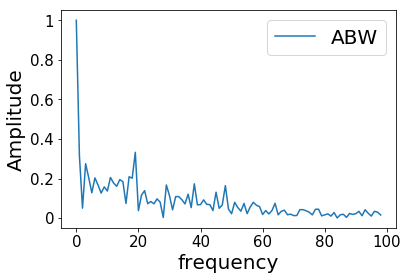

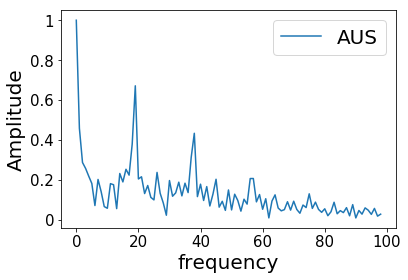

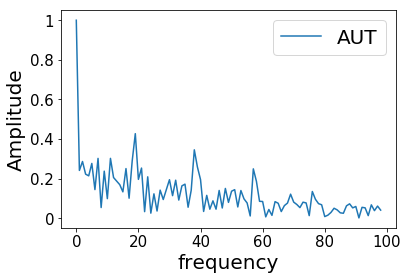

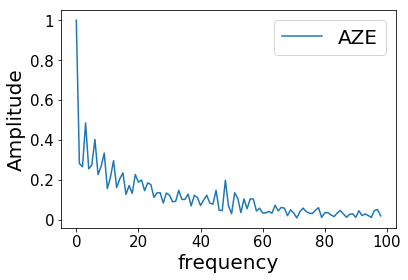

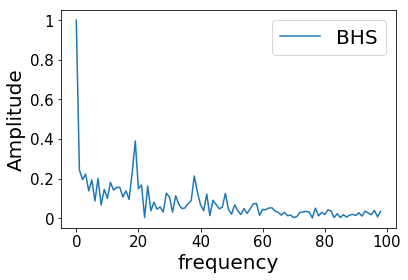

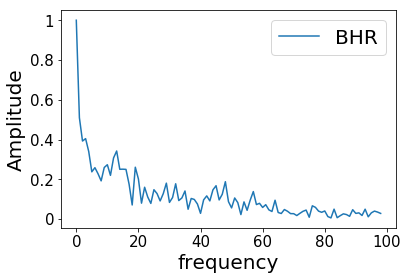

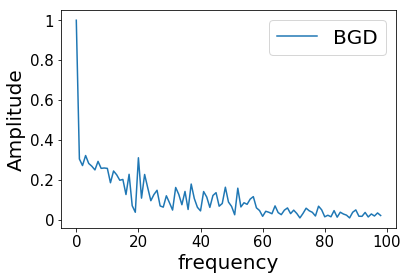

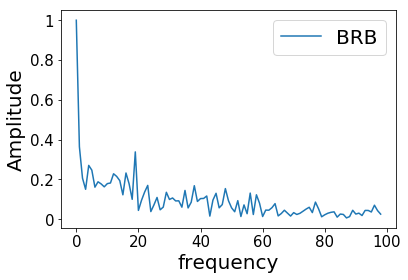

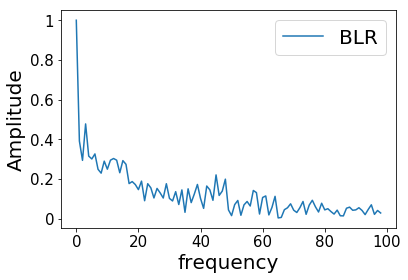

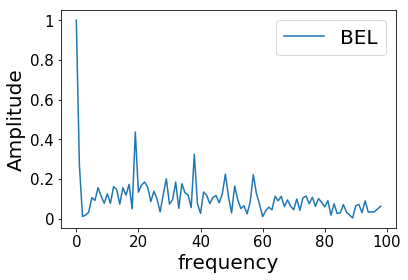

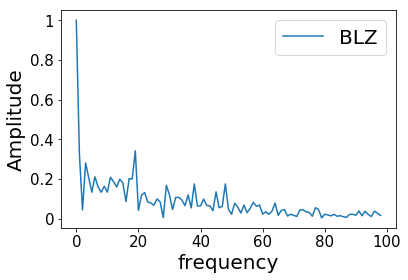

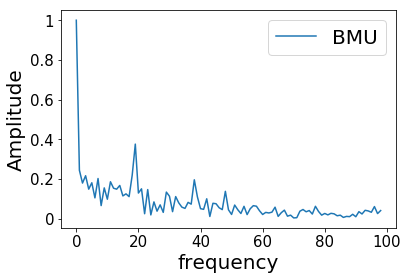

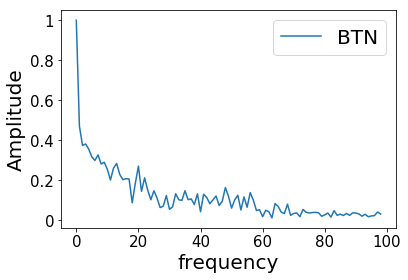

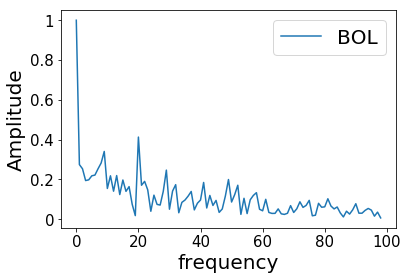

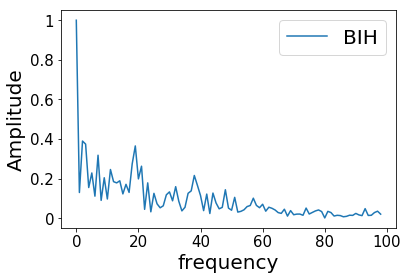

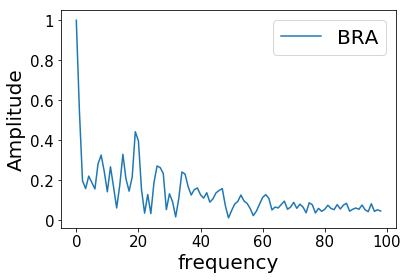

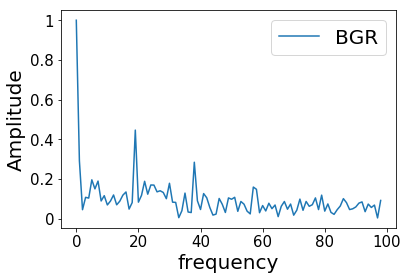

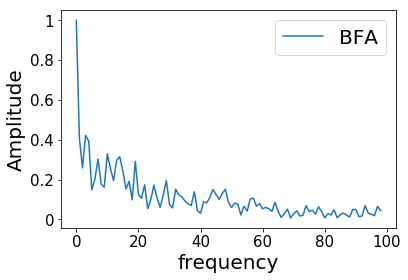

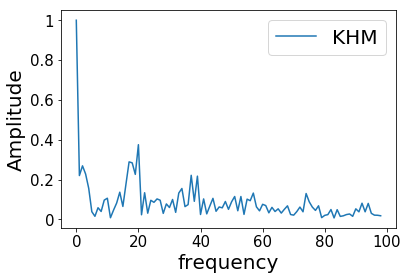

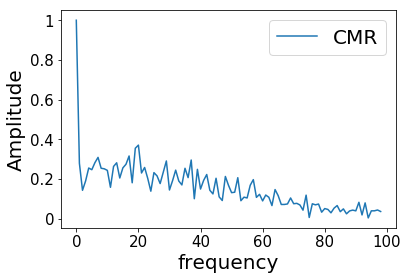

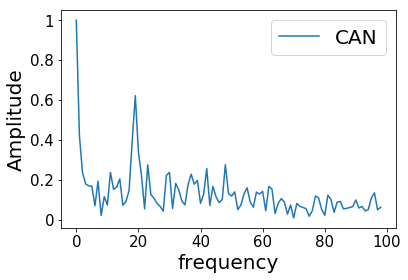

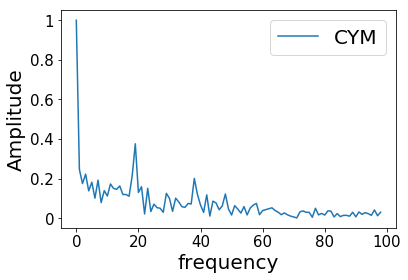

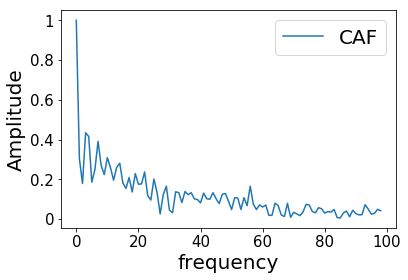

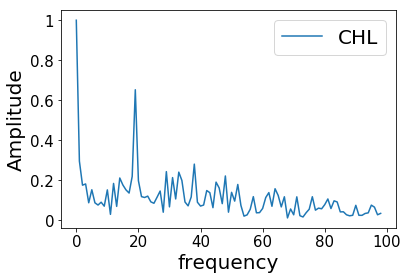

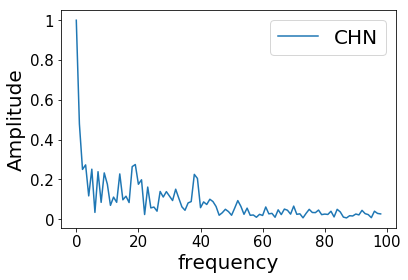

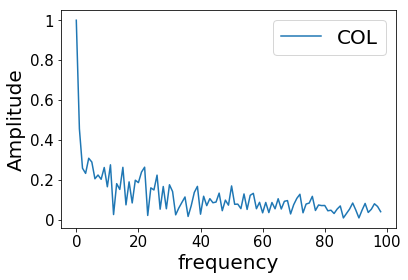

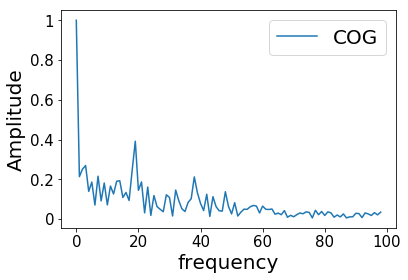

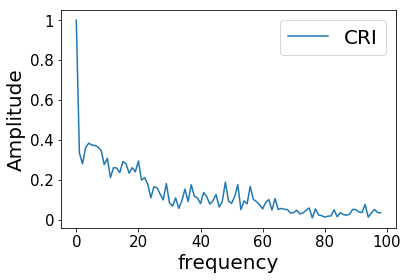

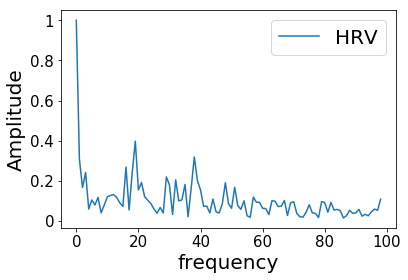

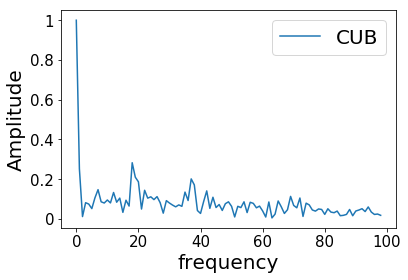

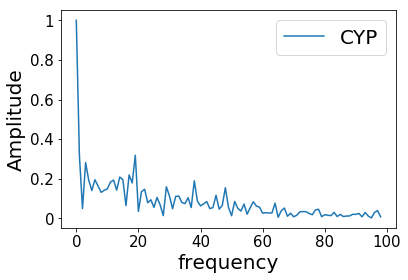

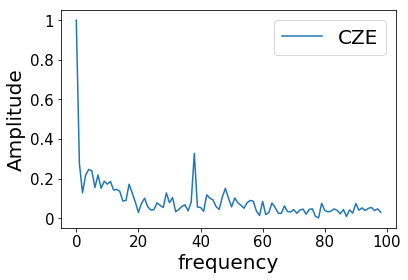

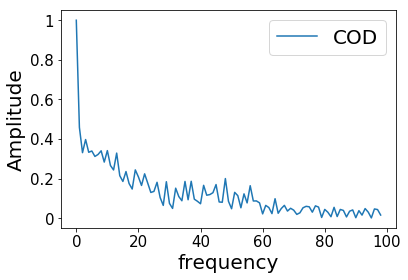

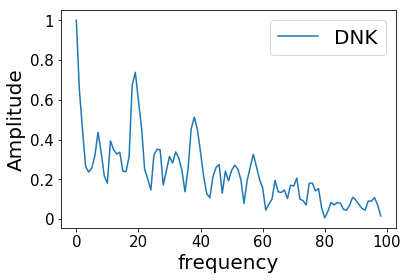

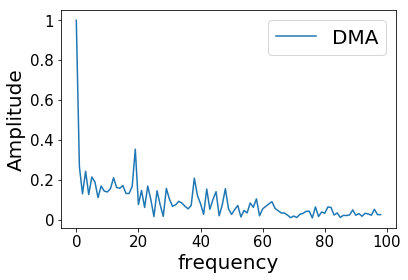

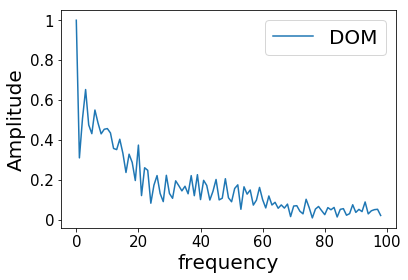

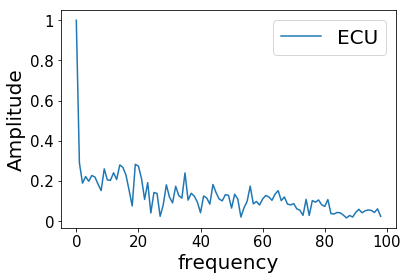

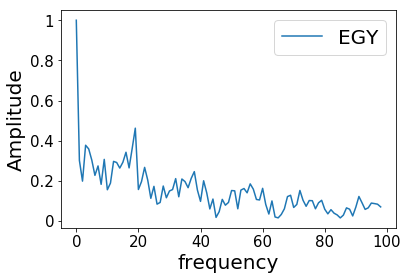

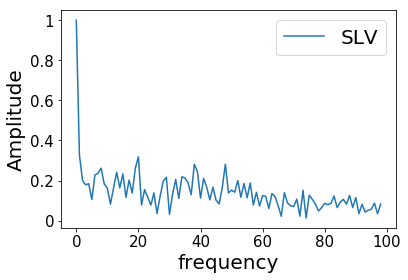

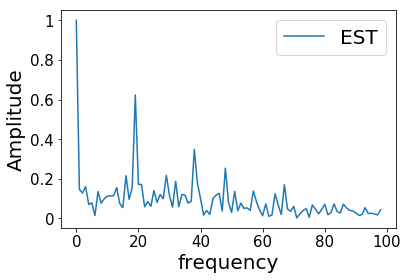

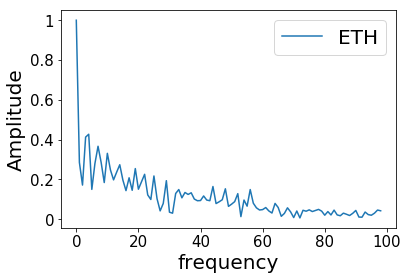

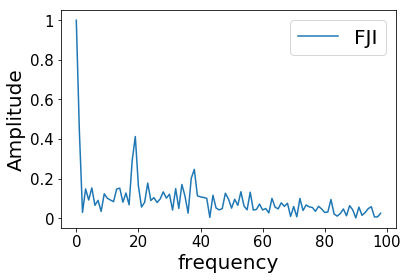

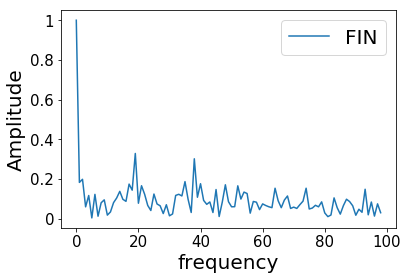

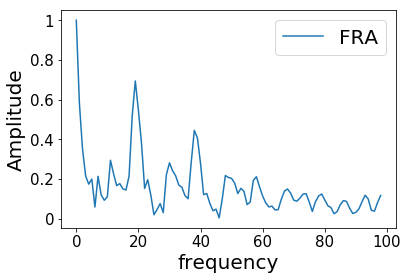

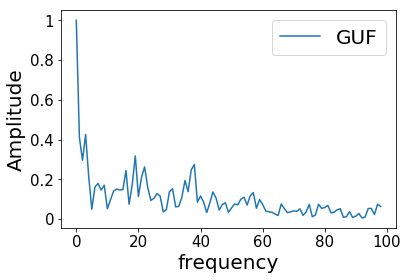

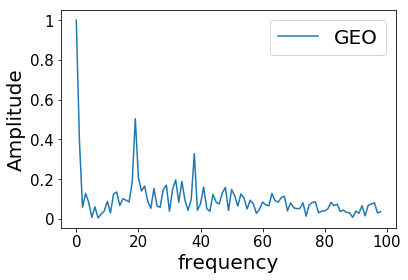

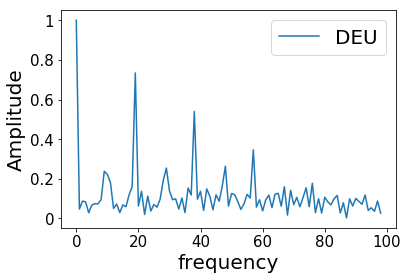

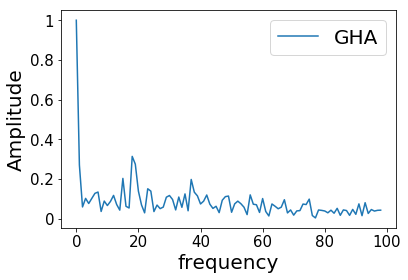

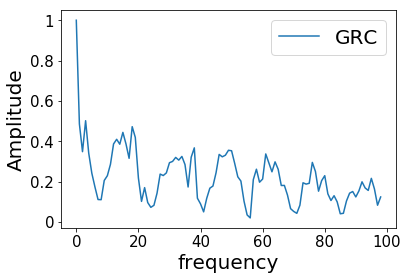

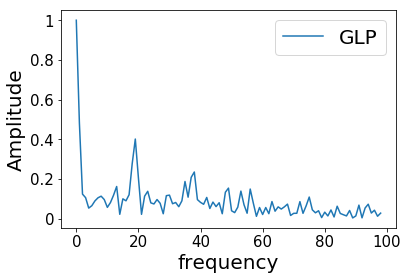

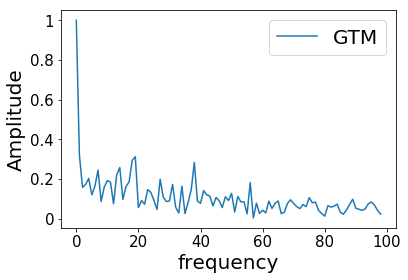

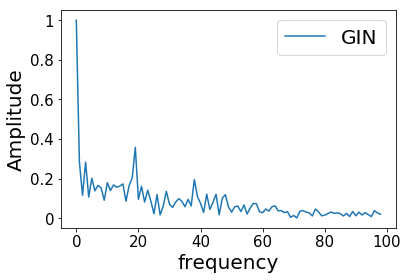

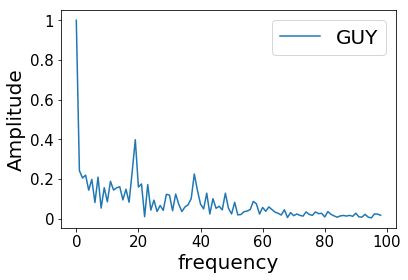

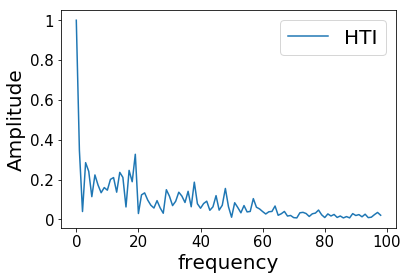

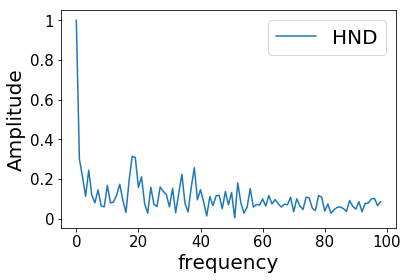

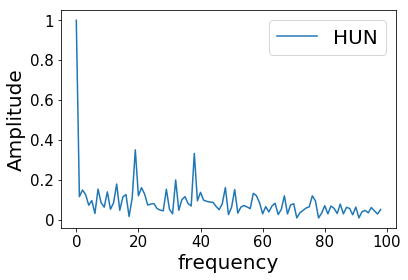

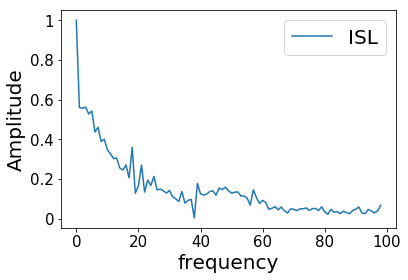

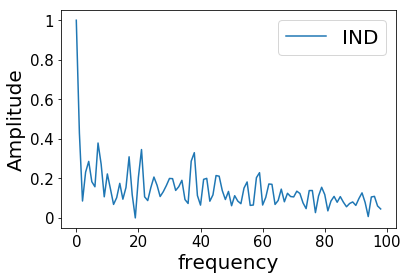

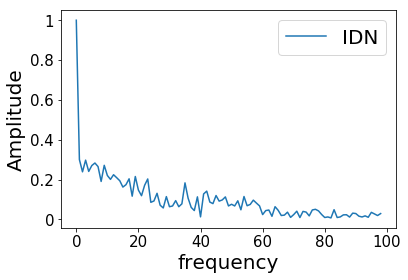

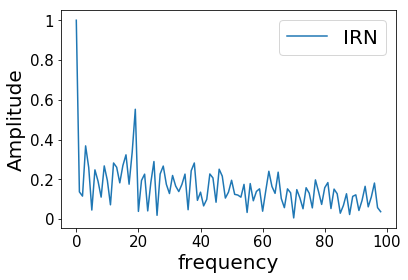

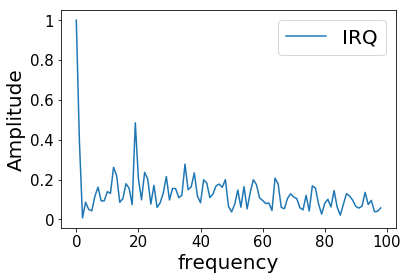

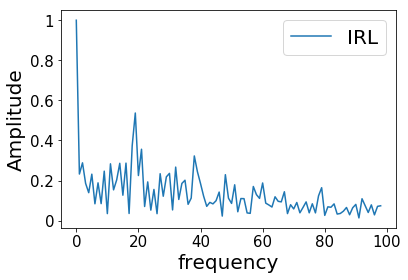

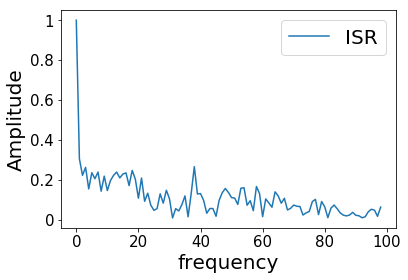

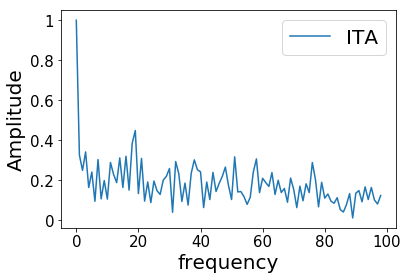

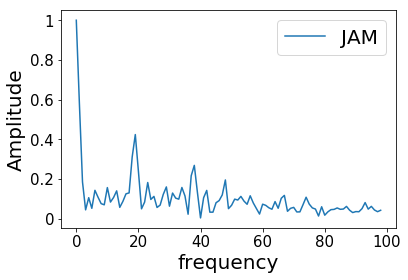

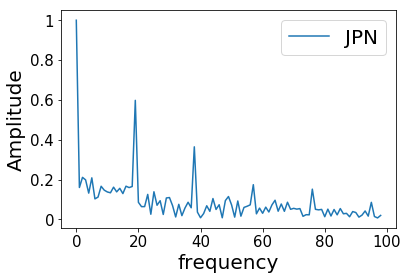

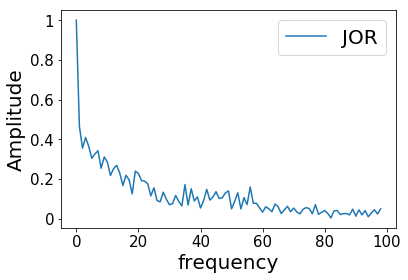

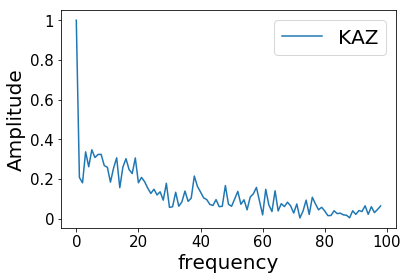

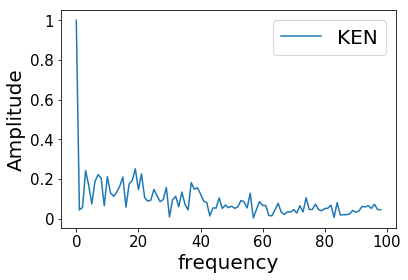

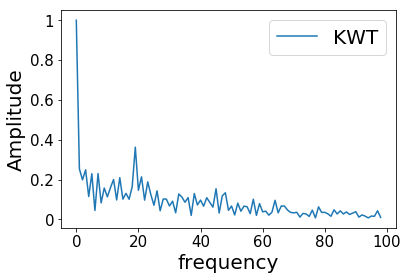

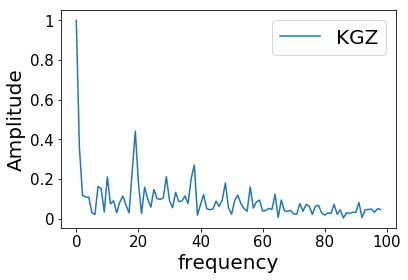

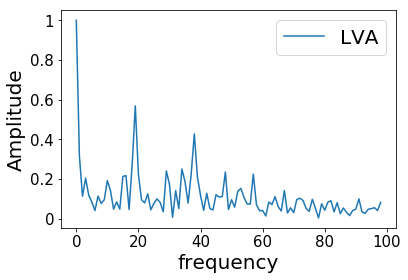

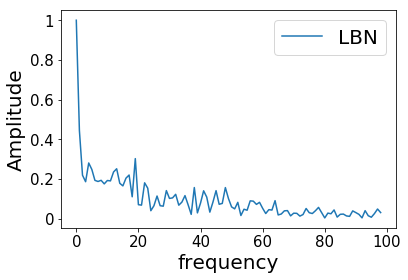

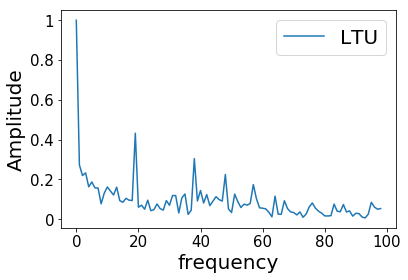

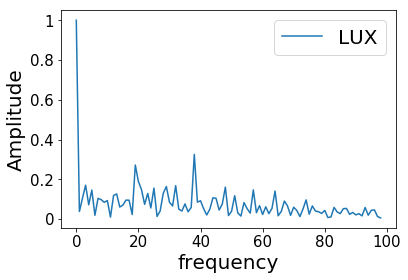

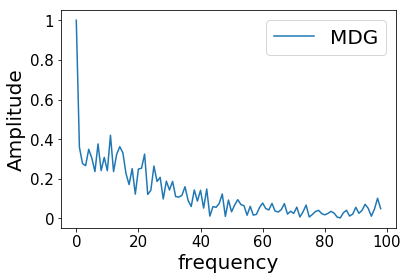

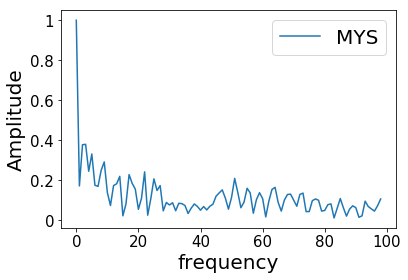

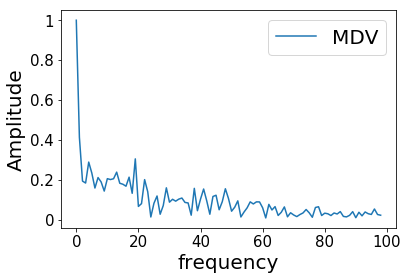

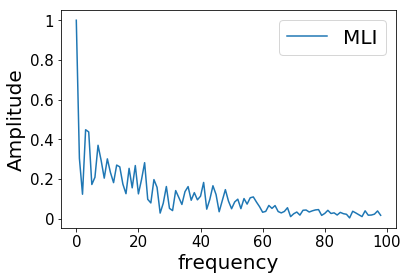

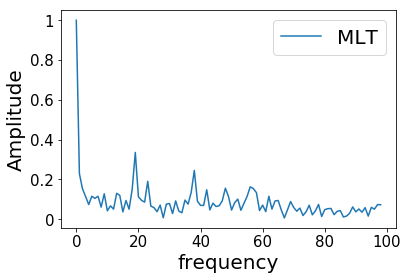

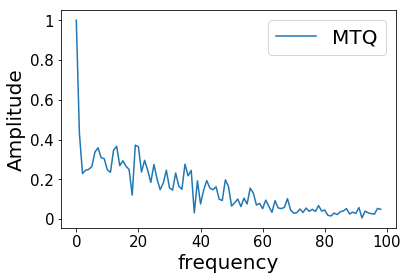

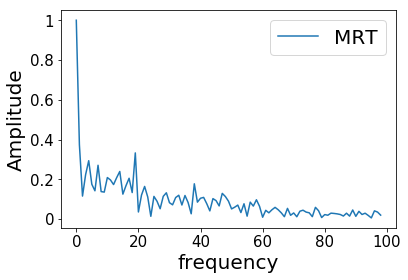

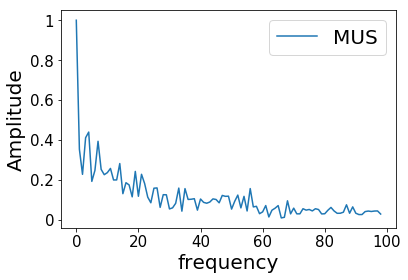

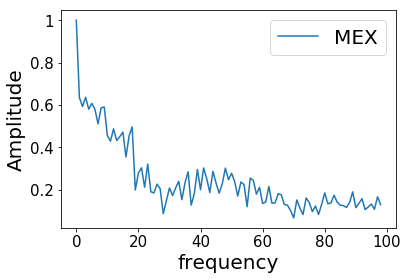

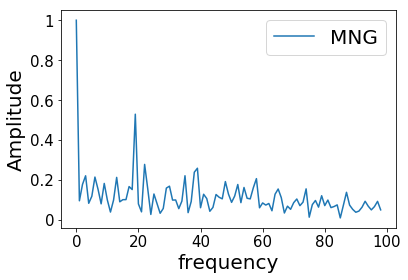

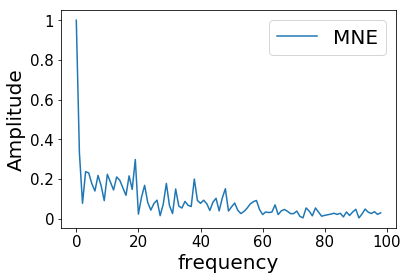

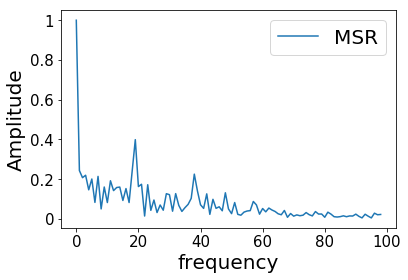

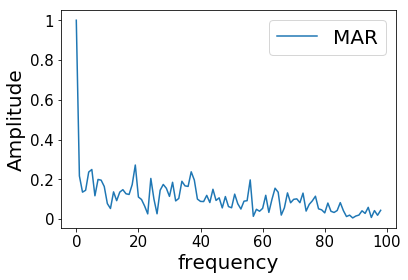

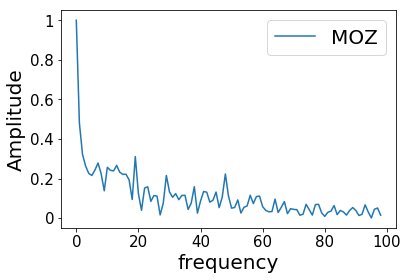

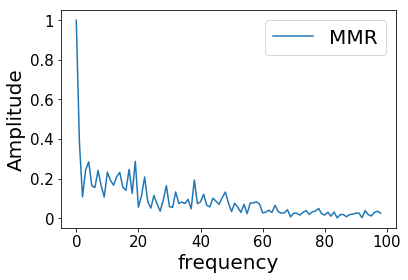

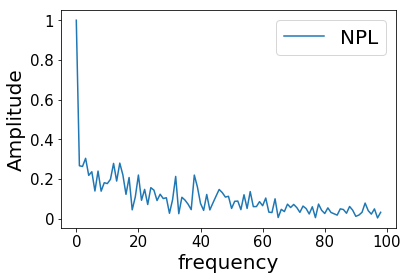

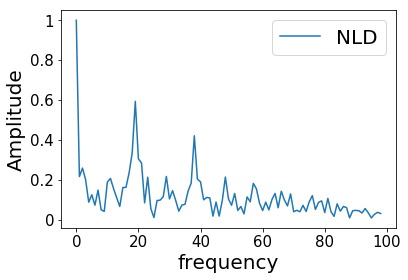

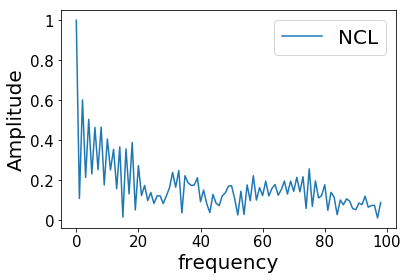

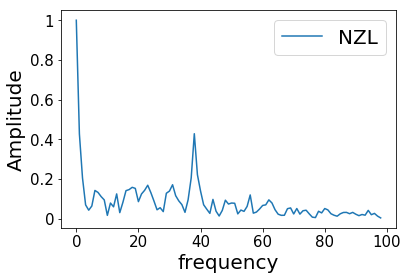

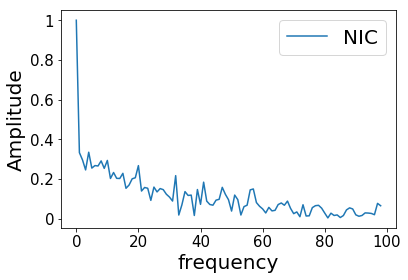

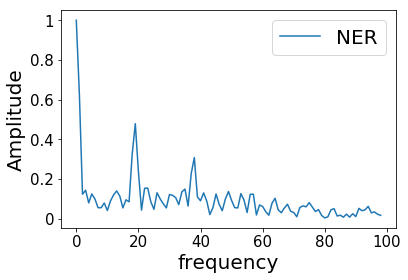

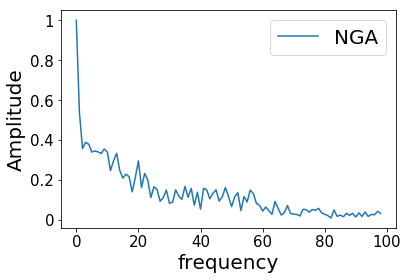

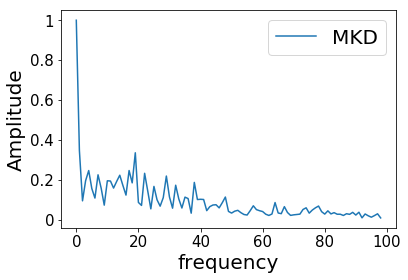

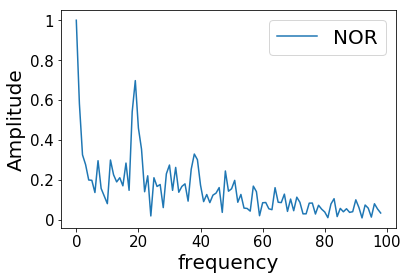

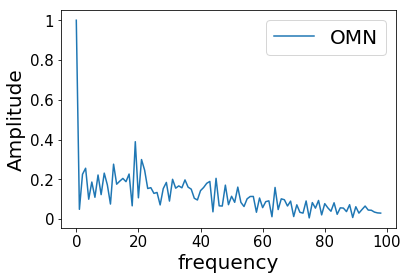

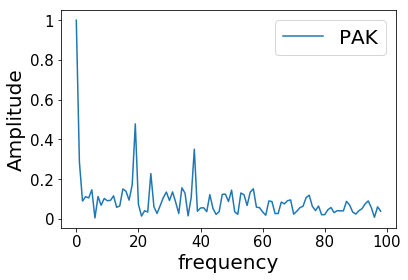

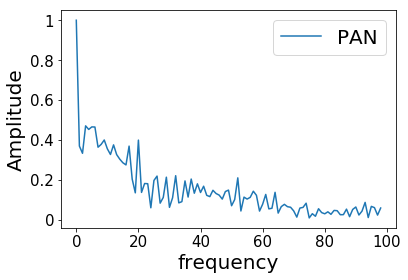

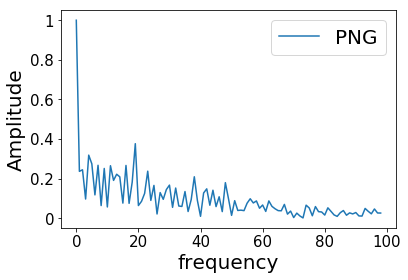

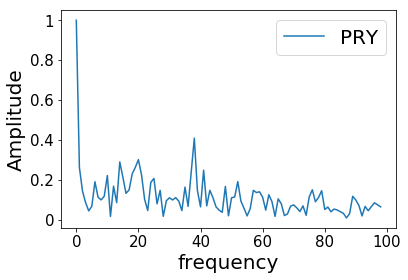

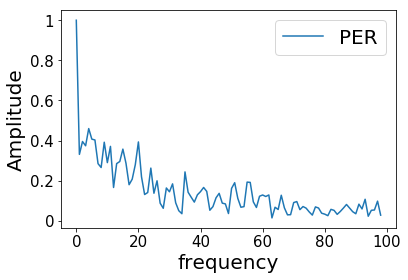

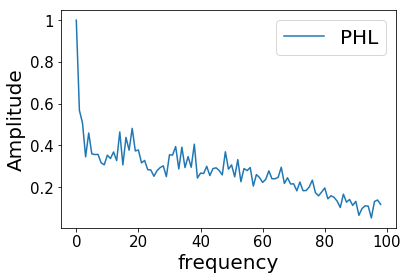

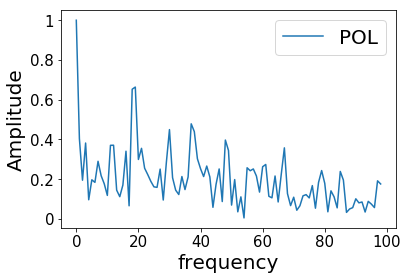

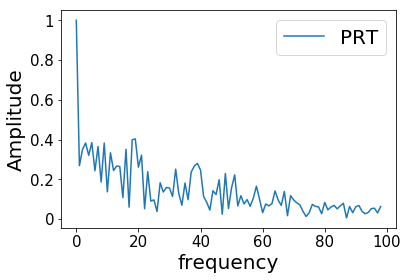

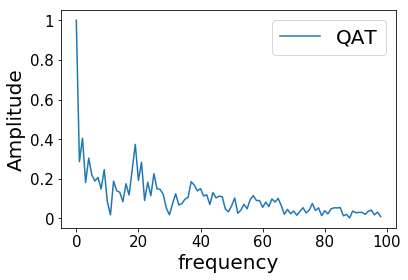

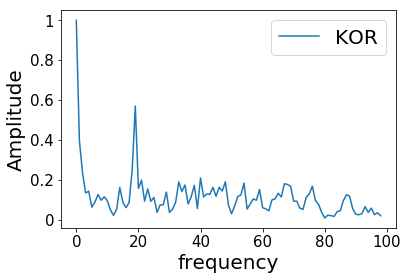

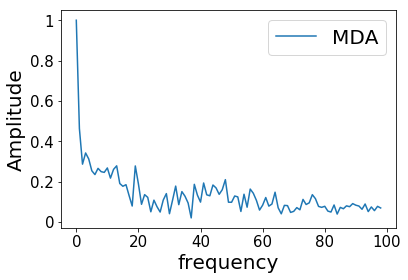

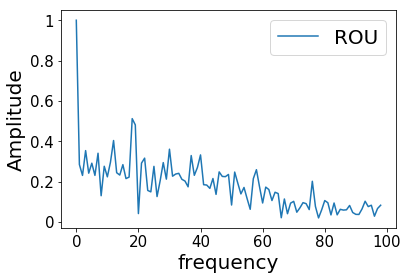

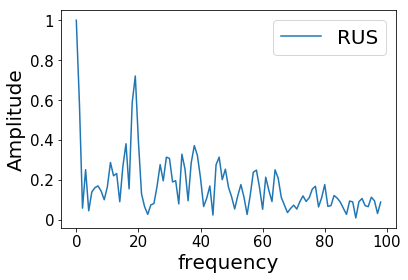

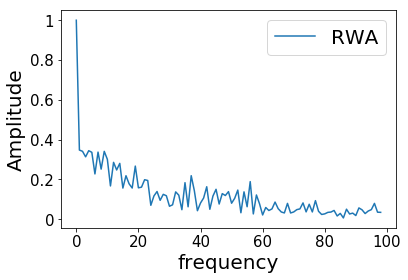

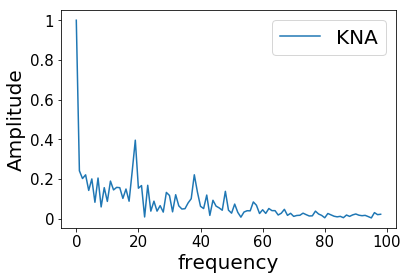

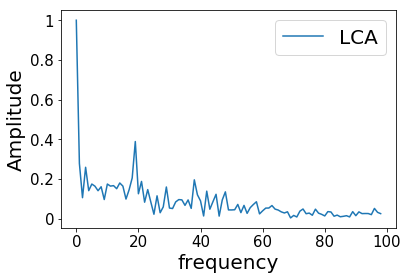

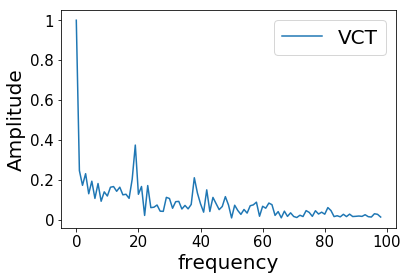

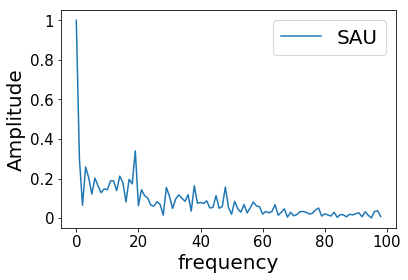

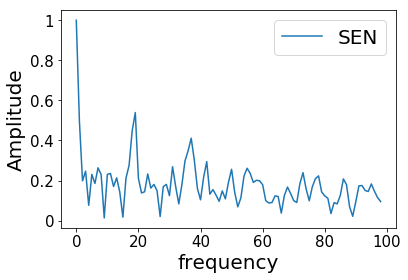

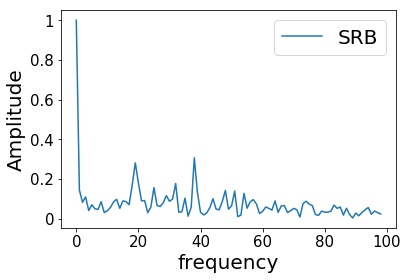

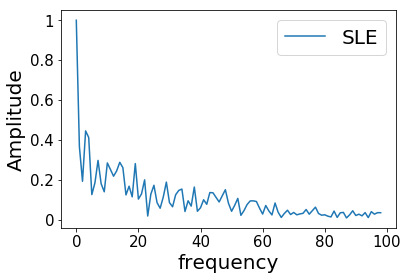

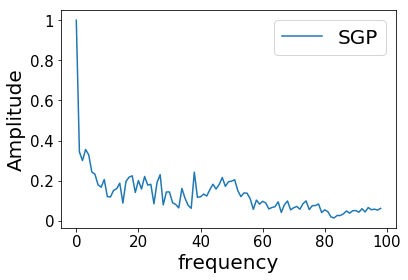

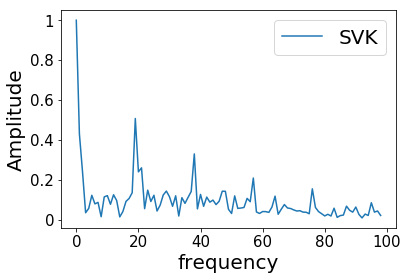

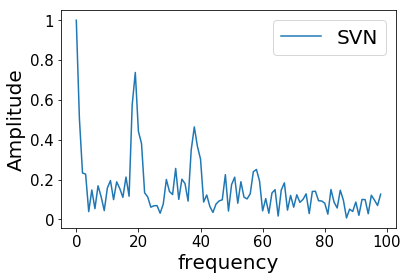

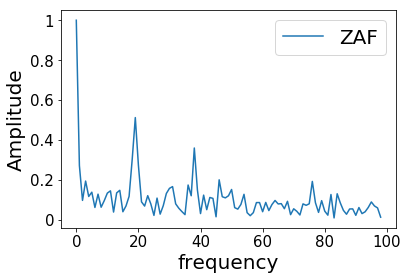

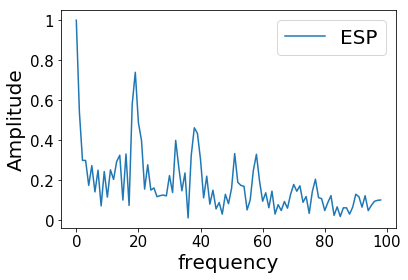

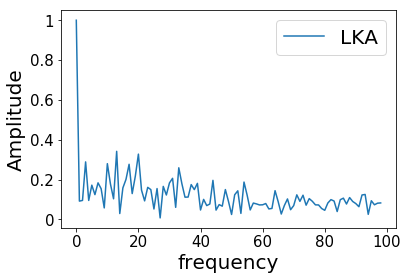

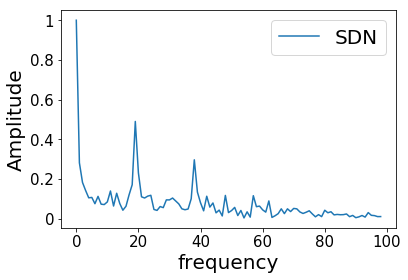

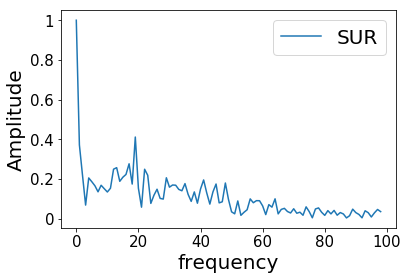

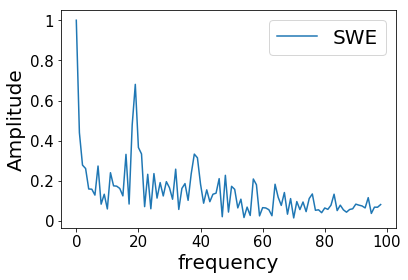

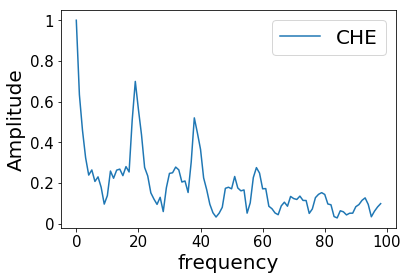

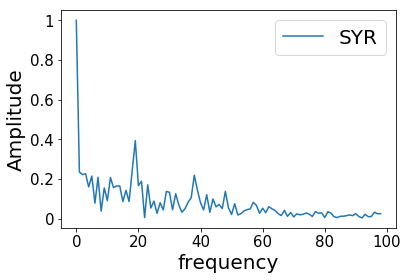

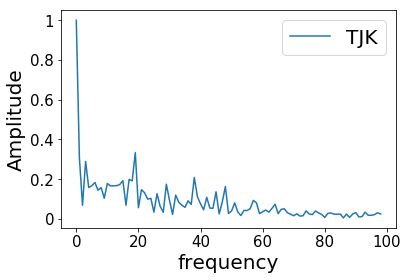

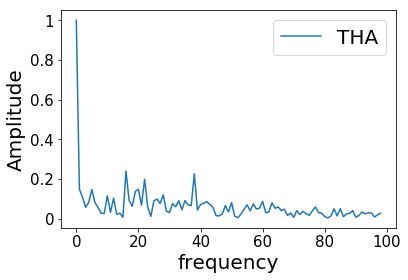

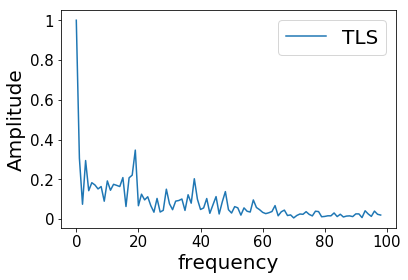

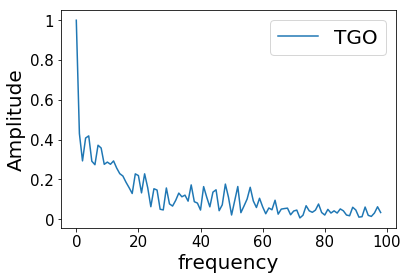

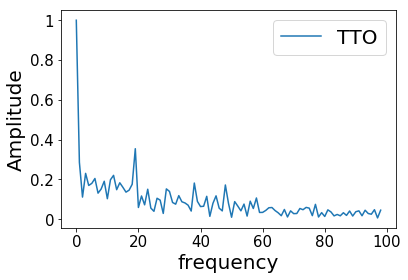

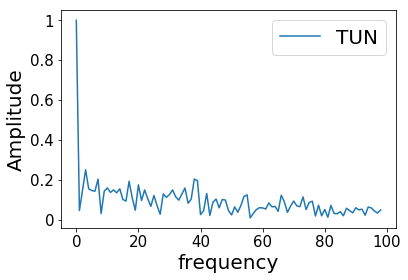

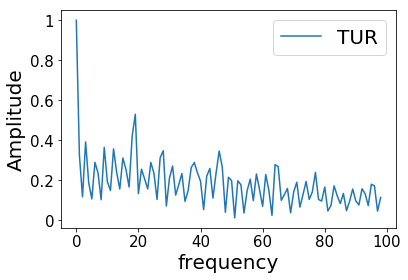

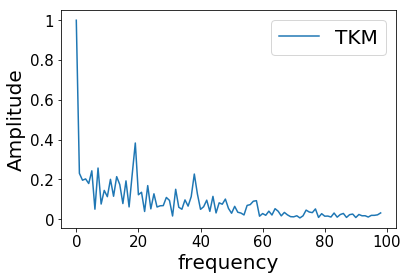

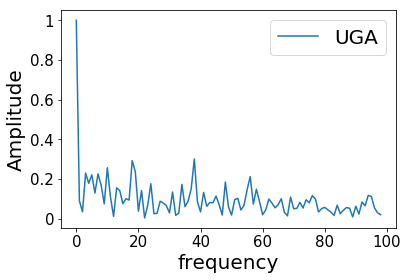

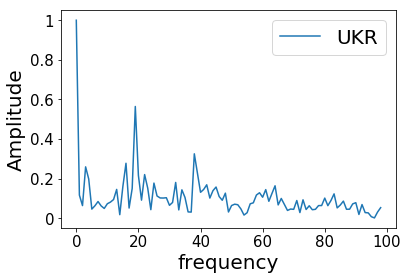

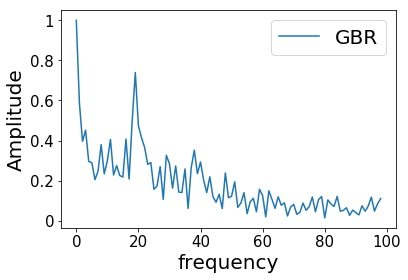

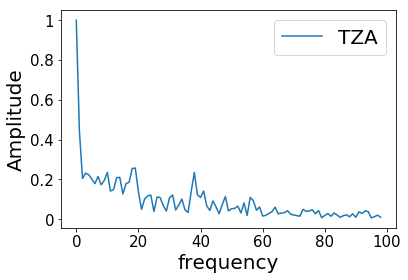

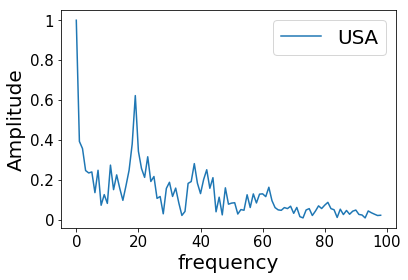

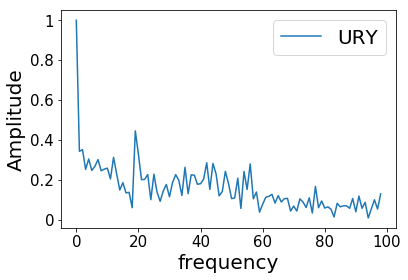

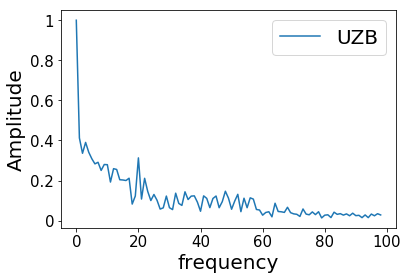

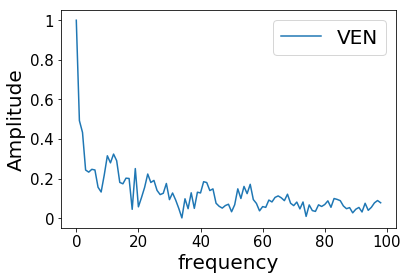

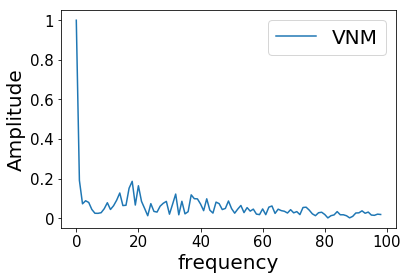

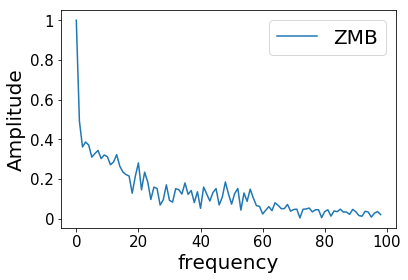

In [139]:
from scipy.fftpack import fft
from matplotlib.ticker import FormatStrFormatter
for cc_name in cc:
    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2g'))
    num_v = data.loc[data.index==cc_name].values[0]
    #plt.plot(num_v)
    lens = num_v.shape[0]
    f_pa = np.absolute(fft(num_v))[0:int(lens/10)]
    plt.plot(np.arange(0,int(lens/10)),f_pa.reshape(1,-1)[0]/f_pa[0])
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.xlabel("frequency",fontsize=20)
    plt.ylabel("Amplitude",fontsize=20)
    plt.legend([cc_name],fontsize=20)
    plt.savefig("../Data/Fourier/Fourier_All/"+cc_name+".pdf",bbox_inches="tight")
    plt.savefig("../Data/Fourier/Fourier_All/"+cc_name+".jpg",bbox_inches="tight")

In [98]:
data = pd.DataFrame.from_dict(dic).T
data = data.fillna(data.mean())

In [10]:
num = data.sum()

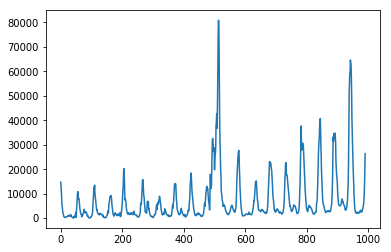

In [76]:
def relu(x):
    return max(x,0)
vrelu = np.vectorize(relu)

#num_v = np.log(num.values)
num_v = num.values
plt.plot(num_v)

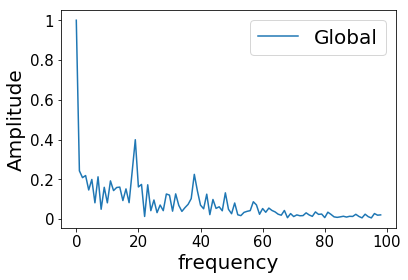

In [136]:
from scipy.fftpack import fft
from matplotlib.ticker import FormatStrFormatter

data = pd.DataFrame.from_dict(dic).T
data = data.fillna(data.mean())
num = data.sum()
num_v = num.values

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2g'))
#num_v = data.loc[data.index=="CHN"].values[0]
#plt.plot(num_v)
lens = num_v.shape[0]
f_pa = np.absolute(fft(num_v))[0:int(lens/10)]
plt.plot(np.arange(0,int(lens/10)),f_pa.reshape(1,-1)[0]/f_pa[0])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("frequency",fontsize=20)
plt.ylabel("Amplitude",fontsize=20)
plt.legend(["Global"],fontsize=20)
plt.savefig("../Data/Fourier/show/Global.jpg",bbox_inches="tight")


In [141]:
data.shape

(158, 991)